In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
file_path = 'online_retail_II.xlsx'

# Load both sheets and combine them
data_2009_2010 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
data_2010_2011 = pd.read_excel(file_path, sheet_name='Year 2010-2011')
combined_data = pd.concat([data_2009_2010, data_2010_2011], ignore_index=True)

In [3]:
# Step 2: Handle missing values
# Drop rows with missing 'Customer ID' or 'Description'
cleaned_data = combined_data.dropna(subset=['Customer ID', 'Description'])

In [4]:
# Step 3: Remove duplicates
cleaned_data = cleaned_data.drop_duplicates()

In [5]:
# Step 4: Feature engineering
# Extract "Day of Week" and "Time of Day" from 'InvoiceDate'
cleaned_data['Day of Week'] = cleaned_data['InvoiceDate'].dt.day_name()
cleaned_data['Time of Day'] = cleaned_data['InvoiceDate'].dt.hour

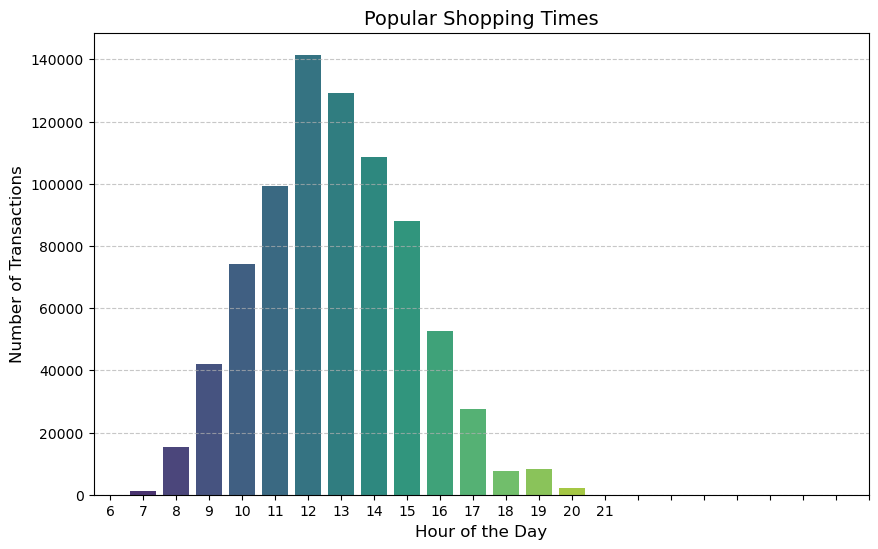

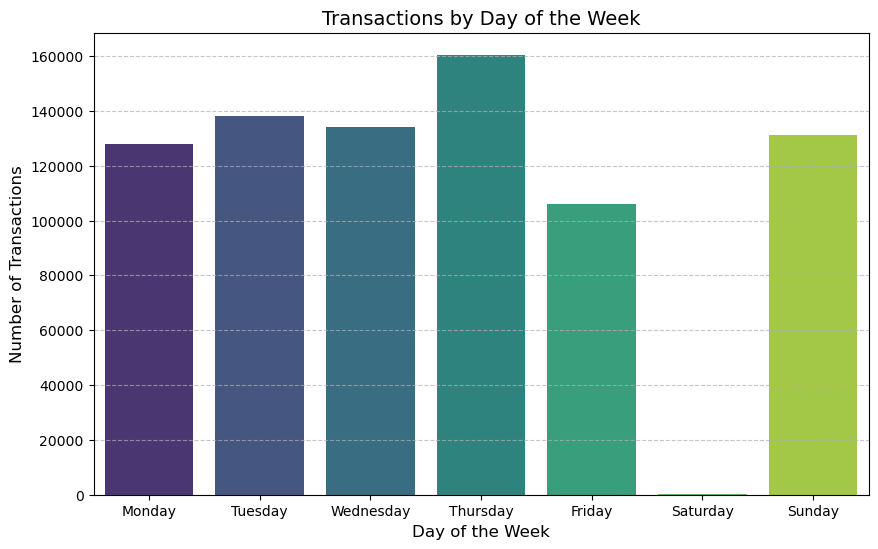

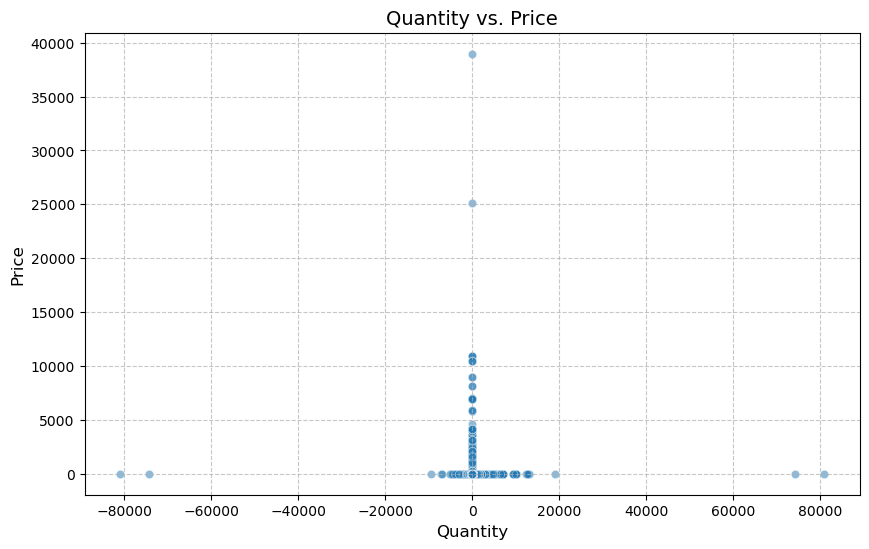

In [6]:
# Step 5: Visualization
# 1. Popular shopping times
plt.figure(figsize=(10, 6))
sns.countplot(x='Time of Day', data=cleaned_data, palette='viridis')
plt.title('Popular Shopping Times', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Sales trends by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=cleaned_data, order=[
              'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Transactions by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Correlation between Quantity and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Price', data=cleaned_data, alpha=0.5)
plt.title('Quantity vs. Price', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Step 6: Summary statistics for additional insights
print("Summary Statistics:")
print(cleaned_data[['Quantity', 'Price']].describe())

# Save the cleaned and enriched dataset
cleaned_data.to_csv('cleaned_online_retail_data.csv', index=False)

Summary Statistics:
            Quantity          Price
count  797885.000000  797885.000000
mean       12.602980       3.702732
std       191.670371      71.392549
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000
